In [10]:
import torch
import numpy as np
%load_ext autoreload
%autoreload 2
import pinot
import dgl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds = pinot.data.esol()
_, __, norm, unnorm = pinot.data.utils.normalize(ds)
# ds = pinot.data.utils.batch(ds, 8)
ds_tr, ds_te = pinot.data.utils.split(ds, [2, 1])
ds_tr = pinot.data.utils.batch(ds_tr, len(ds_tr))
ds_te = pinot.data.utils.batch(ds_te, len(ds_te))

In [7]:
graph_kernel = pinot.inference.gp.gpr.variational_gpr.VGPR(
    kernel=pinot.inference.gp.kernels.deep_kernel.DeepKernel(
        base_kernel=pinot.inference.gp.kernels.rbf.RBF(),
        representation=pinot.representation.Sequential(
            layer=pinot.representation.dgl_legacy.gn(),
            config=[32, 'tanh', 32, 'tanh', 32, 'tanh'])),
    n_tr=752)

In [8]:
opt = torch.optim.Adam(graph_kernel.parameters(), 1e-3)
x_tr, y_tr = ds_tr[0]
y_tr = norm(y_tr)
for _ in range(500):
    opt.zero_grad()
    loss = graph_kernel.loss(x_tr, y_tr).sum()
    loss.backward()
    print(loss)
    opt.step()

/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/variational_gpr.py:45: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.sigma_diag.shape[0]-1)[:, None],
/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/variational_gpr.py:46: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.sigma_diag.shape[0]-1)[None, :]),


tensor(746807.5000, grad_fn=<SumBackward0>)
tensor(745626.8750, grad_fn=<SumBackward0>)
tensor(744736.1250, grad_fn=<SumBackward0>)
tensor(740741.7500, grad_fn=<SumBackward0>)
tensor(819225.2500, grad_fn=<SumBackward0>)
tensor(782642.5000, grad_fn=<SumBackward0>)
tensor(633570.0625, grad_fn=<SumBackward0>)
tensor(737800.3125, grad_fn=<SumBackward0>)
tensor(792444.7500, grad_fn=<SumBackward0>)
tensor(665555.6250, grad_fn=<SumBackward0>)
tensor(849507.3750, grad_fn=<SumBackward0>)
tensor(729478.9375, grad_fn=<SumBackward0>)
tensor(722688.6875, grad_fn=<SumBackward0>)
tensor(839834.6875, grad_fn=<SumBackward0>)
tensor(754675.2500, grad_fn=<SumBackward0>)
tensor(693606.4375, grad_fn=<SumBackward0>)
tensor(806620.2500, grad_fn=<SumBackward0>)
tensor(704523.7500, grad_fn=<SumBackward0>)
tensor(681725.2500, grad_fn=<SumBackward0>)
tensor(663905.2500, grad_fn=<SumBackward0>)
tensor(688122.3125, grad_fn=<SumBackward0>)
tensor(675454.8750, grad_fn=<SumBackward0>)
tensor(731773.5625, grad_fn=<Sum

tensor(524068.3125, grad_fn=<SumBackward0>)
tensor(504794.7812, grad_fn=<SumBackward0>)
tensor(513914.5625, grad_fn=<SumBackward0>)
tensor(487414.6562, grad_fn=<SumBackward0>)
tensor(529385.9375, grad_fn=<SumBackward0>)
tensor(467649.8438, grad_fn=<SumBackward0>)
tensor(519971.2812, grad_fn=<SumBackward0>)
tensor(515259.8125, grad_fn=<SumBackward0>)
tensor(461183.1562, grad_fn=<SumBackward0>)
tensor(490889.4375, grad_fn=<SumBackward0>)
tensor(487293.5625, grad_fn=<SumBackward0>)
tensor(449045.2188, grad_fn=<SumBackward0>)
tensor(455484.4062, grad_fn=<SumBackward0>)
tensor(474032.1875, grad_fn=<SumBackward0>)
tensor(484610.7500, grad_fn=<SumBackward0>)
tensor(498636.3750, grad_fn=<SumBackward0>)
tensor(454960.6875, grad_fn=<SumBackward0>)
tensor(514316.4062, grad_fn=<SumBackward0>)
tensor(447210.5625, grad_fn=<SumBackward0>)
tensor(476619.3750, grad_fn=<SumBackward0>)
tensor(459898., grad_fn=<SumBackward0>)
tensor(414040.3125, grad_fn=<SumBackward0>)
tensor(464426.4062, grad_fn=<SumBack

tensor(215993.1719, grad_fn=<SumBackward0>)
tensor(235860.0312, grad_fn=<SumBackward0>)
tensor(239754.4531, grad_fn=<SumBackward0>)
tensor(251332.5312, grad_fn=<SumBackward0>)
tensor(211475.9375, grad_fn=<SumBackward0>)
tensor(214236.3750, grad_fn=<SumBackward0>)
tensor(226311.6562, grad_fn=<SumBackward0>)
tensor(234651.3750, grad_fn=<SumBackward0>)
tensor(230477.8281, grad_fn=<SumBackward0>)
tensor(212053.0938, grad_fn=<SumBackward0>)
tensor(233952.5156, grad_fn=<SumBackward0>)
tensor(211749.3125, grad_fn=<SumBackward0>)
tensor(215326.7812, grad_fn=<SumBackward0>)
tensor(215630.6562, grad_fn=<SumBackward0>)
tensor(227110.2969, grad_fn=<SumBackward0>)
tensor(225578.9688, grad_fn=<SumBackward0>)
tensor(251077.4062, grad_fn=<SumBackward0>)
tensor(246247.8281, grad_fn=<SumBackward0>)
tensor(240257.7500, grad_fn=<SumBackward0>)
tensor(242888.0156, grad_fn=<SumBackward0>)
tensor(236966.8906, grad_fn=<SumBackward0>)
tensor(221763.5781, grad_fn=<SumBackward0>)
tensor(235588.8594, grad_fn=<Sum

In [11]:
x_te, y_te = ds_te[0]
distribution = graph_kernel.condition(x_tr, y_tr, x_te)

/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/variational_gpr.py:45: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.sigma_diag.shape[0]-1)[:, None],
/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/variational_gpr.py:46: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.sigma_diag.shape[0]-1)[None, :]),


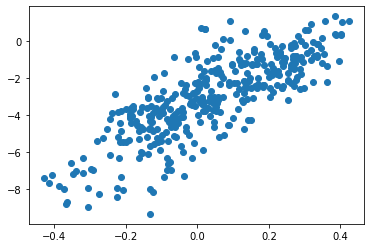

In [13]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from matplotlib import pyplot as plt

plt.scatter(distribution.mean.detach().numpy(), y_te)



In [38]:
dgl.unbatch(x_te)[332]

DGLGraph(num_nodes=12, num_edges=22,
         ndata_schemes={'type': Scheme(shape=(1,), dtype=torch.float32), 'h': Scheme(shape=(117,), dtype=torch.float32)}
         edata_schemes={})